In [100]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
df.isnull().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [102]:
df.shape

(150, 5)

In [103]:
#labelling species in form of number
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['species'] = lb.fit_transform(df['species'])

In [104]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [152]:
import numpy as np
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = df[features]
Y = df['species']

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=48)
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
121           5.6          2.8           4.9          2.0
117           7.7          3.8           6.7          2.2
5             5.4          3.9           1.7          0.4
40            5.0          3.5           1.3          0.3
125           7.2          3.2           6.0          1.8
..            ...          ...           ...          ...
64            5.6          2.9           3.6          1.3
91            6.1          3.0           4.6          1.4
81            5.5          2.4           3.7          1.0
51            6.4          3.2           4.5          1.5
0             5.1          3.5           1.4          0.2

[105 rows x 4 columns]


In [154]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_test

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [156]:
Y_predict = gnb.predict(X_test)
print(Y_predict)

[1 1 1 0 2 2 0 2 0 1 2 0 0 2 1 1 0 1 1 2 0 2 2 1 2 0 0 2 2 1 2 1 2 0 1 2 2
 1 0 1 1 1 2 2 1]


In [157]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]], dtype=int64)

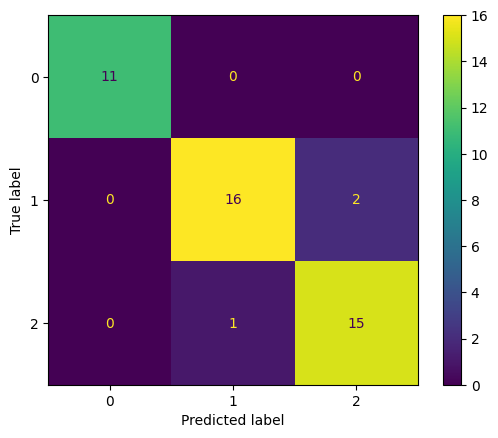

In [158]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
acc = accuracy_score(Y_test, Y_predict)
print("Accuracy score is: ", acc)

Accuracy score is:  0.9333333333333333


In [160]:
print("Error rate: ", 1-acc)

Error rate:  0.06666666666666665


In [161]:
print("Precision Score is: ", precision_score(Y_test, Y_predict, average='macro'))

Precision Score is:  0.9411764705882352


In [162]:
print("Recall Score is: ", recall_score(Y_test, Y_predict, average='macro'))

Recall Score is:  0.9421296296296297


In [163]:
print("F1 score is: ", f1_score(Y_test, Y_predict, average='macro'))

F1 score is:  0.9411255411255411
